# 环境准备

## 软硬件资源

PyTorch  2.3.0
Python  3.12(ubuntu22.04)
CUDA  12.1
GPU L20(48GB) * 1
CPU 20 vCPU Intel(R) Xeon(R) Platinum 8457C
内存 100GB

注意：Qwen2.5-Omni 推理测试，GPU资源至少需要32G以上；尤其是视频理解等需要资源更多。

## 安装相关依赖
Qwen2.5-Omni 在 Hugging Face Transformers 上的代码目前处于拉取请求阶段，尚未合并到主分支。因此，您可能需要从源代码构建才能使用，构建命令如下：
```bash
pip uninstall transformers
pip install git+https://github.com/huggingface/transformers@f742a644ca32e65758c3adb36225aef1731bd2a8
pip install accelerate

```
安装如下：
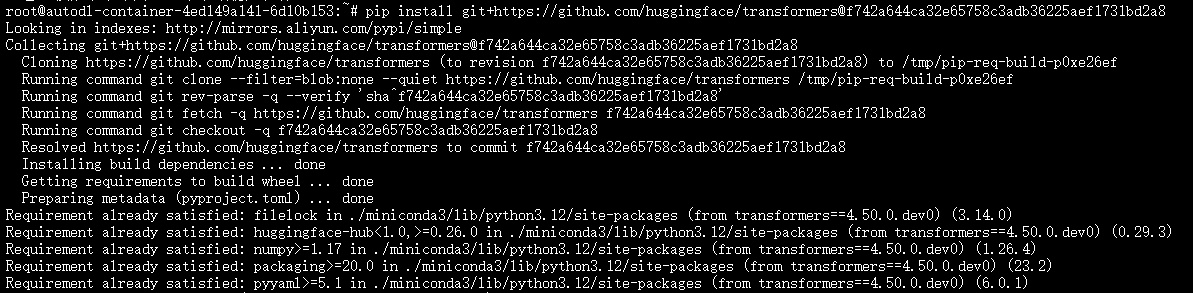
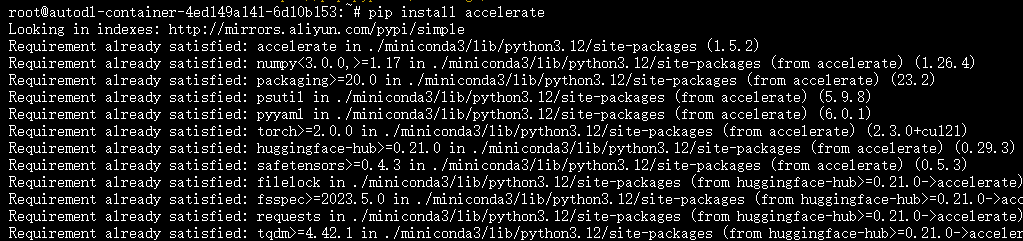

## 安装qwen-omni-utils
我们提供一套工具，帮助更方便地处理各种类型的音频和视觉输入，就像使用 API 一样。这包括 base64、URL 和交错音频、图像和视频。
我们可以使用以下命令进行安装，并确保系统已安装 ffmpeg ：
```bash
pip install qwen-omni-utils
```
安装完成如下：
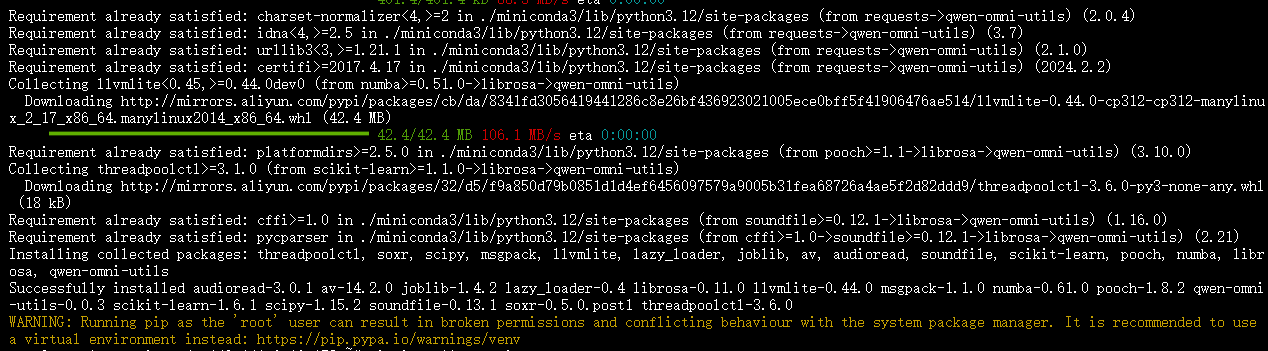

## 安装flash-attn
```bash
pip install -U flash-attn --no-build-isolation
```
安装完成如下：
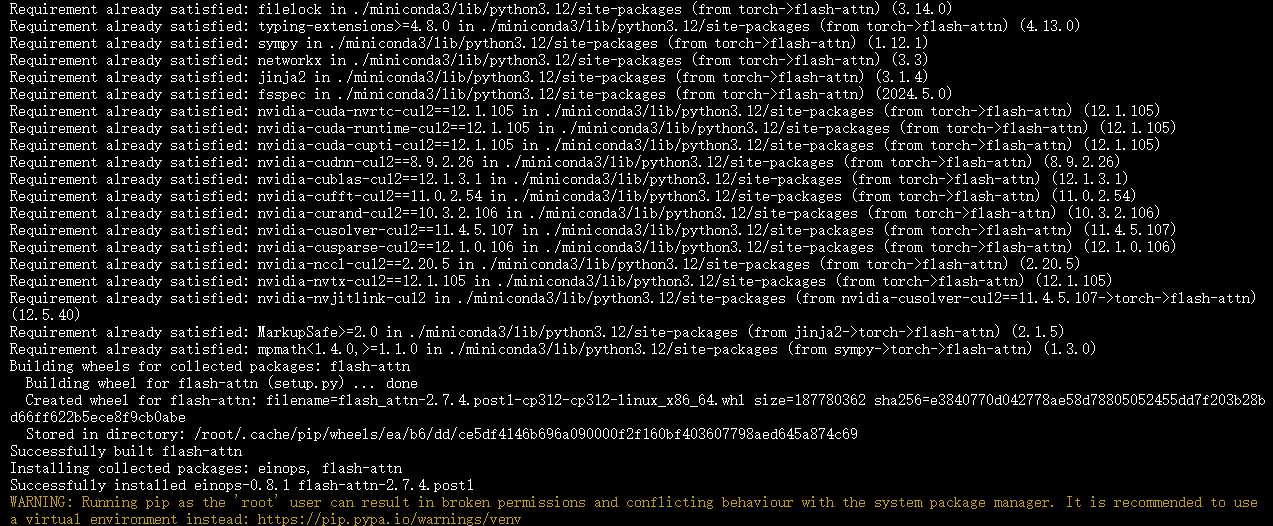


## 安装其他依赖
```bash
pip install triton
```
安装如下：

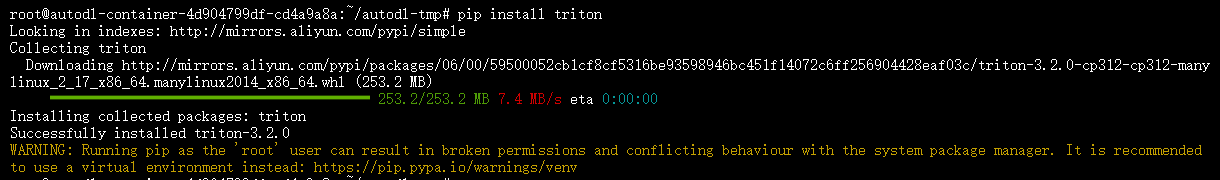

## 安装ffmpeg
视频理解推理过程中需要ffmpeg进行视频处理

检查是否安装：
```bash
ffmpeg -version
```
安装命令如下：
```bash
sudo apt update
sudo apt install ffmpeg
```

# 下载模型

先安装modelscope用于下载管理模型
```bash
pip install modelscope
```
![image.png](images/modelscope.png)
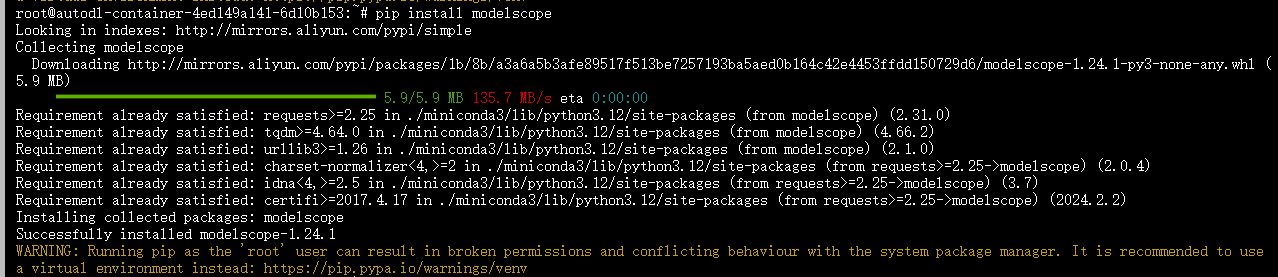

下载模型文件到本地，方便离线推理
这段代码用modelscope库的snapshot_download函数下载模型。
Qwen/Qwen2.5-Omni-7B是模型在平台上的名字，
cache_dir是你要把模型存到哪里，你可以自己改，revision='master’表示下最新版本。

下载的时候，网络要稳定，存储路径别写错，不然就下不了。代码写好后，直接执行，模型就开始下载了，下载时间要看网速。
注意：也可以直接将上面代码封装到python文件中（例如：download.py）直接执行python download.py即可。

In [1]:
from modelscope import snapshot_download
model_dir = snapshot_download('Qwen/Qwen2.5-Omni-7B', cache_dir='/root/autodl-tmp', revision='master')

2025-04-02 10:44:56,943 - modelscope - WARNING - Using branch: master as version is unstable, use with caution
2025-04-02 10:44:57,389 - modelscope - INFO - Got 20 files, start to download ...


Processing 20 items:   0%|          | 0.00/20.0 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

